In [26]:
import os
import json
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from src import settings
from src.utils import fileio, graph_utils

TREATMENT = "CsCh"

INPUT_DIR = SCRIPT_OUTPUT = os.path.join(
    settings.RESULTS_DIR, TREATMENT, "distances_traveled"
)
distances = fileio.load_files_from_folder(INPUT_DIR, ".csv")

INPUT_DIR = SCRIPT_OUTPUT = os.path.join(
    settings.OUTPUT_DIR, TREATMENT, "1_1_create_snapshots", "60_sec_window"
)
interactions = fileio.load_multiple_folders(INPUT_DIR)

group = []
for distances_name, distances_path in distances.items():
    interactions_path = interactions[distances_name.replace(".csv","")] 
    interactions_group = fileio.load_files_from_folder(interactions_path, ".gml")

    res = []
    for graph_name, graph_path in interactions_group.items():
        G = nx.read_gml(graph_path)
        out_deg = G.out_degree()
        res.append(dict(out_deg))

    summed_dict = {}

    for dictionary in res:
        # Iterate over the keys in the current dictionary
        for key in dictionary.keys():
            # Add the corresponding value to the sum, or initialize it if not present
            summed_dict[key] = summed_dict.get(key, 0) + dictionary[key]

    distances = pd.read_csv(distances_path,index_col=0)
    distances = distances.sum()

    for key in summed_dict.keys():
        group.append((summed_dict[key], distances[key], distances_name.replace(".csv", "")))

In [13]:
group = group[:24]

/tmp/ipykernel_2890178/689938841.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab10', num_groups)


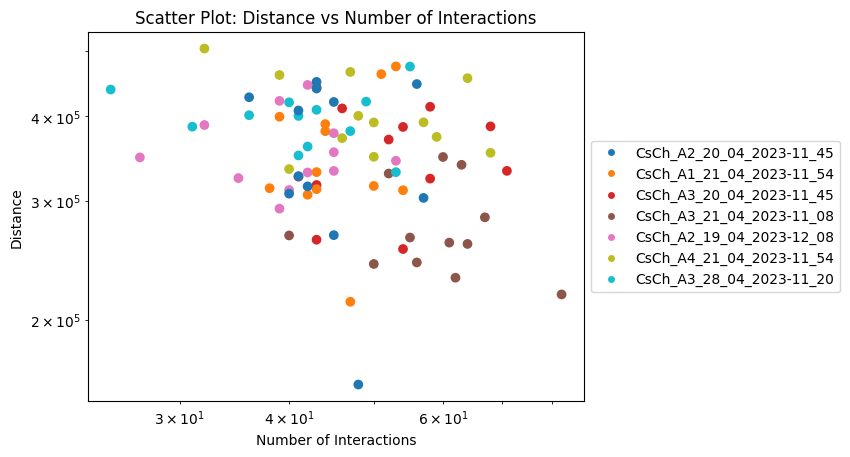

In [28]:
x = [item[0] for item in group]
y = [item[1] for item in group]
groups = [item[2] for item in group]
unique_groups = list(set(groups))
num_groups = len(unique_groups)

colormap = plt.cm.get_cmap('tab10', num_groups)
group_colors = [colormap(i) for i in range(num_groups)]
group_color_map = dict(zip(unique_groups, group_colors))
colors = [group_color_map[group] for group in groups]

# Plot scatter plot
plt.scatter(x, y, c=colors)


legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, label=group) for group, color in group_color_map.items()]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylabel('Distance')
plt.xlabel('Number of Interactions')
plt.title('Scatter Plot: Distance vs Number of Interactions')
plt.show()